In [2]:
import gudhi
import wfdb 
import numpy as np

import persistencecurves as pc

from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

In [3]:
signals, fields = wfdb.rdsamp('data/arrhythmia/100', channels=[0], sampfrom=0, sampto=2000)

In [4]:
def quasi_attractorize(series, step):
    n = series.shape[0]

    z = []
    for i in range(n - step + 1):
        z.append(series[i:i + step].reshape(1, 3)[0])

    return np.array(z)

In [5]:
attractor = quasi_attractorize(signals, 3)

In [6]:
def plot_attractor(attractor):
    fig = plt.figure()
    ax = plt.axes(projection='3d')

    ax.scatter(xs=attractor[:, 0],
            ys=attractor[:, 1],
            zs=attractor[:, 2])
    plt.show()

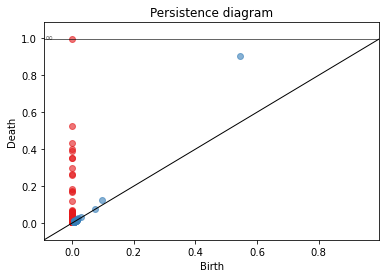

In [38]:
rips = gudhi.RipsComplex(points=attractor)
simplex_tree = rips.create_simplex_tree(max_dimension=2)

diag = simplex_tree.persistence()
gudhi.plot_persistence_diagram(diag)

In [39]:
def extract_numpy_from_diag(diagram):
    tuples = [x[1] for x in diagram]
    xs = np.array([d[0] for d in tuples])
    ys = np.array([d[1] for d in tuples])

    return np.array([xs, ys]).T

In [40]:
np_diag = extract_numpy_from_diag(diag)
pc_diagram = pc.Diagram(Dgm=np_diag)

In [41]:
betti_curve = pc_diagram.Betticurve(meshstart=0, meshstop=200, num_in_mesh=200)

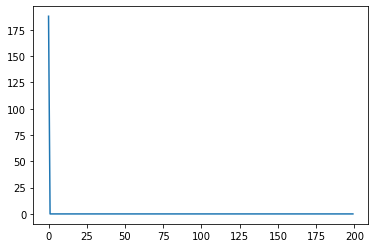

In [42]:
plt.plot(betti_curve)